# [IAPR][iapr]: Lab 3 ‒  Classification


**Group ID:** 19

**Author 1 (sciper):** Pierre Chassagne 289475  
**Author 2 (sciper):** Thomas Berger 287838  
**Author 3 (sciper):** Thomas Peeters 288239 

**Release date:** 23.04.2021  
**Due date:** 07.05.2021 


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [2]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


### 1.1 Bayes method (5 pts)
Using the Bayes method, give the analytical expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data.
For simplicity reasons, round the estimated parameters to the closest integer value.

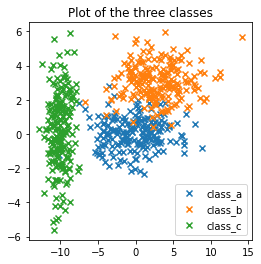

In [3]:
# plot the graph with the different points : 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plt.scatter(a[:,0],a[:,1], marker= 'x',label='class_a')
plt.scatter(b[:,0],b[:,1], marker= 'x', label='class_b')
plt.scatter(c[:,0],c[:,1], marker= 'x', label='class_c')
plt.title("Plot of the three classes" )

plt.legend()




In [4]:
print("Number of point in a: %d,\nNumber of point in b: %d,\nNumber of point in c: %d." % (len(a),len(b),len(c)))

Number of point in a: 200,
Number of point in b: 200,
Number of point in c: 200.


As the class have the same number of point we can assume the three classes have equal prior probabilities for next computations.

Looking at the plot, we observe that each class have a different $\Sigma$, and circular covariance ($\Sigma = \sigma I^2$) are not a good approximation but diagonal covariance matrix will be sufficient $ \Sigma = \left( \begin{matrix} \sigma_1 & 0 \\ 0 & \sigma_2 \end{matrix} \right) $ (Covariance will have ellipsoidal shape aligned with x and y axis).

In [5]:
# Add your implementation and discussion
import numpy as np

# compute the mean of the three classes :
mean_a=np.mean(a,0)
mean_b=np.mean(b,0)
mean_c=np.mean(c,0)

print('\n mean_a: \n',mean_a)
print('\n mean_b: \n',mean_b)
print('\n mean_c: \n',mean_c)

# Compute the covariance of the three classes : Sigma=1/M*X*X_T with M: number of sample and X=x-x_mean

M=len(a)
aT_norm=np.transpose(a-mean_a)
cov_a=1/M*np.matmul(aT_norm,a-mean_a)
print('\n cov_a: \n',cov_a)

M=len(b)
bT_norm=np.transpose(b-mean_b)
cov_b=1/M*np.matmul(bT_norm,b-mean_b)
print('\n cov_b: \n ',cov_b)

M=len(c)
cT_norm=np.transpose(c-mean_c)
cov_c=1/M*np.matmul(cT_norm,c-mean_c)
print(' \n cov_c: \n',cov_c)

# we neglect the values not on the diagonal (close to 0) to improve the computation time 
cov_a[0,1]=0
cov_a[1,0]=0
cov_b[0,1]=0
cov_b[1,0]=0
cov_c[0,1]=0
cov_c[1,0]=0

print('\n cov_a: \n',cov_a)
print('\n cov_b: \n ',cov_b)
print(' \n cov_c: \n',cov_c)


 mean_a: 
 [-0.21000115  0.03048009]

 mean_b: 
 [2.8018991 3.0535643]

 mean_c: 
 [-10.05748461   0.22582978]

 cov_a: 
 [[9.97755884 0.13096525]
 [0.13096525 0.83513009]]

 cov_b: 
  [[10.11949638  0.17933652]
 [ 0.17933652  1.07858378]]
 
 cov_c: 
 [[0.96527964 0.23340822]
 [0.23340822 4.67407491]]

 cov_a: 
 [[9.97755884 0.        ]
 [0.         0.83513009]]

 cov_b: 
  [[10.11949638  0.        ]
 [ 0.          1.07858378]]
 
 cov_c: 
 [[0.96527964 0.        ]
 [0.         4.67407491]]


In [6]:
from sympy import *
def show_equation(m1,S1,m2,S2):
    """
    input 
    m1 : mean of the first class
    S1 : covariance of the first class
    m2 : mean of the second class
    S2 : covariance of the second class
    
    output : equation that we have to resolve to get the separation line using Bayes method
    """
    x, y = symbols('x y')
    X=np.array([[x],[y]])
    
    X_T=np.transpose(X)
    
    m1_T=np.transpose(m1)
    S1_inv=np.linalg.inv(S1)
    
    m2_T=np.transpose(m2)
    S2_inv=np.linalg.inv(S2)
    
    # Write the equation using formula from slide 12 course 5
    eq1=-1/2*X_T.dot(S1_inv.dot(X))+1/2*X_T.dot(S1_inv.dot(m1))-1/2*m1_T.dot(S1_inv.dot(m1))+1/2*m1_T.dot(S1_inv.dot(X))  
    print(eq1[0][0],'=0')


To find the line separating two classes we find the points giving equal discriminant function $g_1(x)-g_2(x) = 0 $<br>
<br>$$ \text{with} : g_i(x) = -\dfrac{1}{2} x^T \Sigma_i^{-1} x + \dfrac{1}{2} x^T \Sigma_i^{-1} \mu_i - \dfrac{1}{2} \mu_i^T\Sigma_i^{-1} \mu_i + \dfrac{1}{2} \mu_i^T \Sigma_i^{-1} x + ln(P(w_i))$$<br>
As seen before the prior probabilities are equal therefore the terms $ln(P(w_i))$ cancels out.

In [7]:
def compute_equation(m1,S1,m2,S2):
    """
    input 
    m1 : mean of the first class
    S1 : covariance of the first class
    m2 : mean of the second class
    S2 : covariance of the second class
    
    output : numpy array with the points of the separation curve (using Bayes method)
    """
    m1_T=np.transpose(m1)
    S1_inv=np.linalg.inv(S1)
    
    m2_T=np.transpose(m2)
    S2_inv=np.linalg.inv(S2)

    curve=[]
    
    # Use a grid to compute the values of the function for different x and y and add the (x,y) so that abs(f(x,y))<e-1. 
    for y in np.arange(-20.,20.,0.1): 
        for x in np.arange(-20.,20.,0.1):
            X=np.array([[x],[y]])
            X_T=np.transpose(X)
            
            # Write the equation using formula from slide 12 course 5
            val=-1/2*X_T.dot(S1_inv.dot(X))+1/2*X_T.dot(S1_inv.dot(m1))-1/2*m1_T.dot(S1_inv.dot(m1))+1/2*m1_T.dot(S1_inv.dot(X))-(-1/2*X_T.dot(S2_inv.dot(X))+1/2*X_T.dot(S2_inv.dot(m2))-1/2*m2_T.dot(S2_inv.dot(m2))+1/2*m2_T.dot(S2_inv.dot(X)))
            
            if abs(val)<0.1:
                curve.append((x,y))
    curve=np.asarray(curve)
    return curve
        

In [8]:
# Show the equation we have to solve to compute the separation curve

print('\n equation to solve to get the separation curves between class a and class b:')
show_equation(np.transpose(mean_a),cov_a,np.transpose(mean_b),cov_b)
print('\n equation to solve to get the separation curves between class a and class c:')
show_equation(np.transpose(mean_a),cov_a,np.transpose(mean_c),cov_c)
print('\n equation to solve to get the separation curves between class b and class c :')
show_equation(np.transpose(mean_b),cov_b,np.transpose(mean_c),cov_c)



 equation to solve to get the separation curves between class a and class b:
-0.050112458176925*x**2 - 0.0210473473988645*x - 0.598709115652777*y**2 + 0.0364974190606461*y - 0.00276620591200021 =0

 equation to solve to get the separation curves between class a and class c:
-0.050112458176925*x**2 - 0.0210473473988645*x - 0.598709115652777*y**2 + 0.0364974190606461*y - 0.00276620591200021 =0

 equation to solve to get the separation curves between class b and class c :
-0.0494095734768019*x**2 + 0.276881279059951*x - 0.463570848675401*y**2 + 2.83108678650461*y - 4.71034947185295 =0


In [9]:
# compute the points of the different curves

curve1=compute_equation(np.transpose(mean_a),cov_a,np.transpose(mean_b),cov_b)
curve2=compute_equation(np.transpose(mean_a),cov_a,np.transpose(mean_c),cov_c)
curve3=compute_equation(np.transpose(mean_b),cov_b,np.transpose(mean_c),cov_c)

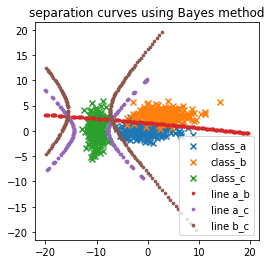

In [10]:
# Plot of the different curves

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plt.scatter(a[:,0],a[:,1], marker= 'x',label='class_a')
plt.scatter(b[:,0],b[:,1], marker= 'x', label='class_b')
plt.scatter(c[:,0],c[:,1], marker= 'x', label='class_c')
plt.scatter(curve1[:,0], curve1[:,1], s=7,label='line a_b');
plt.scatter(curve2[:,0], curve2[:,1], s=7,label='line a_c');
plt.scatter(curve3[:,0], curve3[:,1], s=7,label='line b_c');
plt.title("separation curves using Bayes method" )

plt.legend()

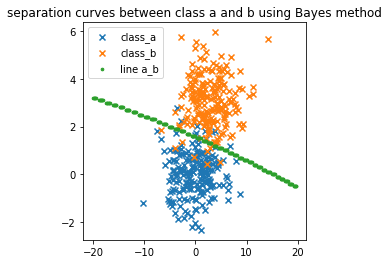

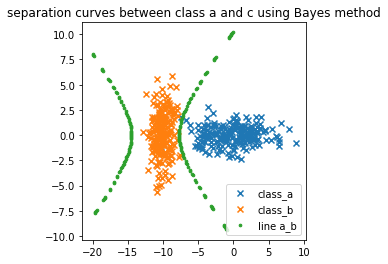

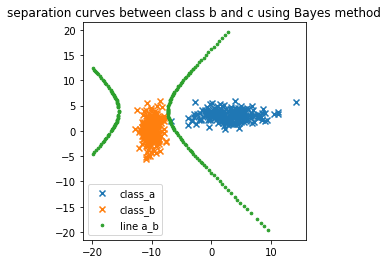

In [11]:
# plot the curve one by one with the corresponding classes that are separated 

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plt.scatter(a[:,0],a[:,1], marker= 'x',label='class_a')
plt.scatter(b[:,0],b[:,1], marker= 'x', label='class_b')
plt.scatter(curve1[:,0], curve1[:,1], s=7,label='line a_b');
plt.title("separation curves between class a and b using Bayes method" )
plt.legend()

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plt.scatter(a[:,0],a[:,1], marker= 'x',label='class_a')
plt.scatter(c[:,0],c[:,1], marker= 'x', label='class_b')
plt.scatter(curve2[:,0], curve2[:,1], s=7,label='line a_b');
plt.title("separation curves between class a and c using Bayes method" )
plt.legend()

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plt.scatter(b[:,0],b[:,1], marker= 'x',label='class_a')
plt.scatter(c[:,0],c[:,1], marker= 'x', label='class_b')
plt.scatter(curve3[:,0], curve3[:,1], s=7,label='line a_b');
plt.title("separation curves between class b and c using Bayes method")
plt.legend()


### 1.2 Mahalanobis distance (5 pts)
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

To estimate at which class each point belong we again compute the two discriminant fucntion for each point $g_1(x)-g_2(x)$ and we check on which on the boundary we are.<br>
<br> The discriminant function for the Mahalanobis distance with equal prior probabilities is:$$g_i(x) = - \dfrac{1}{2} (x-\mu_i)^T \Sigma^{-1} (x-\mu_i)$$<br>
With the Mahalanobis distance we assume both classes have the same covariance, we have use the average of both covariance: $$\Sigma = \dfrac{1}{2} * (\Sigma_1+\Sigma_2)$$


In [12]:
# COMPUTE THE NUMBER OF MISCLASSIFIED USING Mahalanobis distance (slide 18 course 5)



# compute the covariance of a and b again (here we want the full covariance matrix not only the diagonal)
M=len(a)
aT_norm=np.transpose(a-mean_a)
cov_a=1/M*np.matmul(aT_norm,a-mean_a)

M=len(b)
bT_norm=np.transpose(b-mean_b)
cov_b=1/M*np.matmul(bT_norm,b-mean_b)

# assume the same covariance : take the average of the two 

S=1/2*(cov_b+cov_a)


number_of_misclassified=0

a_norma=a-mean_a
a_norma_T=np.transpose(a_norma)
a_normb=a-mean_b
a_normb_T=np.transpose(a_normb)

b_normb=b-mean_b
b_normb_T=np.transpose(b_normb)
b_norma=b-mean_a
b_norma_T=np.transpose(b_norma)

S_inv=np.linalg.inv(S)

number_of_misclassified1=0
number_of_misclassified2=0

# Using slide 18 course 5 we compute (x-mu_i)^T Sigma^-1 (x-mu_i) and we check for which mu_i we get the smallest value
for i in range(0,len(a)):
    val1=(a_norma_T[:,i]).dot(S_inv.dot(a_norma[i,:]))
    val2=(a_normb_T[:,i]).dot(S_inv.dot(a_normb[i,:]))
    if val2<val1:
        number_of_misclassified1 +=1
        
for i in range(0,len(b)):
    val1=(b_normb_T[:,i]).dot(S_inv.dot(b_normb[i,:]))
    val2=(b_norma_T[:,i]).dot(S_inv.dot(b_norma[i,:]))
    if val2<val1:
        number_of_misclassified2 +=1

print('number of misclassified class 1:',number_of_misclassified1)
print('number of misclassified class 2:',number_of_misclassified2)

number of misclassified class 1: 8
number of misclassified class 2: 10


To estimate at which class each point belong we again compute the two discriminant fucntion for each point $g_1(x)-g_2(x)$ and we check on which on the boundary we are.<br>
<br>The discriminant function for complete bayes is:$$g_i(x) = -\dfrac{1}{2} x^T \Sigma_i^{-1} x + \dfrac{1}{2} x^T \Sigma_i^{-1} \mu_i - \dfrac{1}{2} \mu_i^T\Sigma_i^{-1} \mu_i + \dfrac{1}{2} \mu_i^T \Sigma_i^{-1} x + ln(P(w_i))$$<br>
As seen before the prior probabilities are equal therefore the terms $ln(P(w_i))$ cancels out.

In [13]:
# COMPARE WITH THE NUMBER OF MISCLASSIFIED USING "complete" Bayes classification (slide 18 course 5)

def misclassification_bayes(m1,S1,m2,S2,x1,x2):
    m1_T=np.transpose(m1)
    S1_inv=np.linalg.inv(S1)
    
    m2_T=np.transpose(m2)
    S2_inv=np.linalg.inv(S2)

    misclassified_class1=0
    misclassified_class2=0
    
    # compute the values of g1-g2 for x in x1 and x2 and we check on which side of the separation curve it is. 
    for i in range(0,len(x1)):     
            X=np.array([x1[i,0],x1[i,1]])
            X_T=np.transpose(X)
            # Write the equation using formula from slide 12 course 5
            val=-1/2*X_T.dot(S1_inv.dot(X))+1/2*X_T.dot(S1_inv.dot(m1))-1/2*m1_T.dot(S1_inv.dot(m1))+1/2*m1_T.dot(S1_inv.dot(X))-(-1/2*X_T.dot(S2_inv.dot(X))+1/2*X_T.dot(S2_inv.dot(m2))-1/2*m2_T.dot(S2_inv.dot(m2))+1/2*m2_T.dot(S2_inv.dot(X)))
            if val<0:
                misclassified_class1 +=1
    for i in range(0,len(x2)):     
            X=np.array([x2[i,0],x2[i,1]])
            X_T=np.transpose(X)
            # Write the equation using formula from slide 12 course 5
            val=-1/2*X_T.dot(S1_inv.dot(X))+1/2*X_T.dot(S1_inv.dot(m1))-1/2*m1_T.dot(S1_inv.dot(m1))+1/2*m1_T.dot(S1_inv.dot(X))-(-1/2*X_T.dot(S2_inv.dot(X))+1/2*X_T.dot(S2_inv.dot(m2))-1/2*m2_T.dot(S2_inv.dot(m2))+1/2*m2_T.dot(S2_inv.dot(X)))
           
            if val>0:
                misclassified_class2 +=1
    return misclassified_class1,misclassified_class2

test1,test2 = misclassification_bayes(np.transpose(mean_a),cov_a,np.transpose(mean_b),cov_b,a,b)
print('misclassified class 1',test1)
print('misclassified class 2',test2)

misclassified class 1 10
misclassified class 2 9


The classifying is not perfect (about 10% of misclassifcation in either case) mainly due to to the small inter class variance as the two classes overlap. Normally the complete Bayes should perform better as generalize more parameters. <br>However in this case, we can see that using the complete bayes equation lead to worse results with 19 misclassified points against 18 using Mahalanobis distance. This come frome the set of point itself, as the classes overlap both classifier try their best. The fact that both covariance are almost the same give to the Mahalanobis distance a similar performance to complete Bayes.

---

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python. 

**! Warning**: When the lab was created the official MNIST repo was down, if it is still the case please use https://github.com/mkolod/MNIST.

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [14]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [15]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

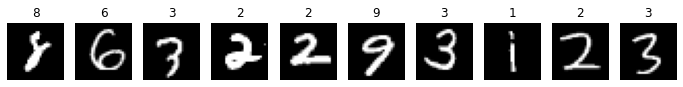

In [16]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP (10 pts)

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [17]:
import torch
from torch import nn
from torch.nn import functional as F

Here we use the PyTorch library in order to create our MLP. First of all we define the **train_model()** function wich is responsible for training the MLP using mini-batches. It returns the total loss for the training and the number of misclassified points calculated using the **compute_nb_errors()** function.

In [18]:
def train_model(model,train_input,train_target,mini_batch_size):
    acc_loss = 0
    nb_errors = 0
    # We do this with mini-batches
    for b in range(0, train_input.size(0), mini_batch_size):
        output = model(train_input.narrow(0, b, mini_batch_size))
        loss = criterion(output, train_target.narrow(0, b, mini_batch_size))
        acc_loss = acc_loss + loss.item()
        
        for i in range(mini_batch_size):
            pred = output[i].max(0)[1].item()
            if train_target[b+i,pred].item() <= 0 : nb_errors = nb_errors + 1
        
        model.zero_grad()
        loss.backward()
        with torch.no_grad():
            for p in model.parameters():
                p -= eta * p.grad
    return acc_loss, nb_errors

def compute_nb_errors(model,inputs,target,mini_batch_size):
    nb_errors = 0
    
    for b in range(0, inputs.size(0), mini_batch_size):
        output = model(inputs.narrow(0, b, mini_batch_size))
        
        for i in range(mini_batch_size):
            pred = output[i].max(0)[1].item()
            if target[b+i,pred].item() <= 0 : nb_errors = nb_errors + 1
    return nb_errors

Here we modify a bit the thargets in order to train our algorithm with MSE loss. The new targets will be of dimension n_samples x 10, with a 1 at the position of the correct class (e.g. if the number is a 5, the target will be [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]).

In [19]:
train_targets = torch.zeros(60000,10)
for i in range(len(train_labels)) :
    train_targets[i, train_labels[i]] = 1.
    
test_targets = torch.zeros(10000,10)
for i in range(len(test_labels)) :
    test_targets[i, test_labels[i]] = 1.

Here we define the MLP and the different parameters to train it. The MLP is composed of on input layer of size 784, one hidden layer of size 100 and one output layer of size 10. The sigmoid activation function is used to give a probability to each class. 

In [20]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 10)
        self.act = nn.Sigmoid()
        self.reLU = nn.ReLU()

    def forward(self, x):
        x = self.reLU(self.fc1(x.view(-1,784)))
        x = self.act(self.fc2(x))
        return x
acc_loss_plt = []    
errRate_train = []
errRate_test = []
model, criterion = Net(), nn.MSELoss()
eta, mini_batch_size = 1e-1, 1000
nb_epochs = 200

for e in range(nb_epochs):
    acc_loss = 0
    # We do this with mini-batches
    acc_loss, nb_errors_train = train_model(model,torch.tensor(train_images),train_targets,mini_batch_size)
    
    nb_errors_test = compute_nb_errors(model,torch.tensor(test_images),test_targets,mini_batch_size)
    
    acc_loss_plt.append(acc_loss)
    errRate_test.append(nb_errors_test*100/len(test_images))
    errRate_train.append(nb_errors_train*100/len(train_images))

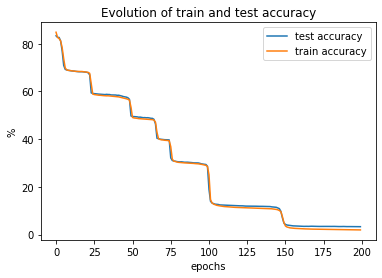

Final value for test accuracy :  3.34 %
Final value for train accuracy :  1.9866666666666666 %


In [21]:
plt.plot(errRate_test, label = "test accuracy")
plt.plot(errRate_train, label = "train accuracy")
plt.title("Evolution of train and test accuracy" )
plt.xlabel('epochs')
plt.ylabel('%')
plt.legend()
plt.show()

print("Final value for test accuracy : ", errRate_test[-1], '%' )
print("Final value for train accuracy : ", errRate_train[-1], '%' )

We can see that it gives quite good results, even if it is not the state of the art, indeed one could achieve better result by trying different training parameters or architecture for example.